In [8]:
import numpy as np
from numpy.random import normal
from numpy import zeros

from termcolor import colored
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from tensorflow.keras.datasets.mnist import load_data

(train_images,train_labels),test_ds = load_data()

n_data = train_images.shape[0]
n_feature = train_images.shape[1] * train_images.shape[2]
b_size = 64
n_batch = n_data//b_size
epochs = 20
lr = 0.03
units  =[64,32,10]

w1 = normal(0,1,(n_feature,units[0]))
B1 = zeros(units[0])

w2 = normal(0,1,(units[0],units[1]))
B2 = zeros(units[1])

w3 = normal(0,1,(units[1],units[2]))
B3 = zeros(units[2])

print(colored("W/B shapes",'green'))
print(f"W1/B1: {w1.shape}/{B1.shape}")
print(f"W2/B2: {w2.shape}/{B2.shape}")
print(f"W3/B3: {w3.shape}/{B3.shape}")                        

W/B shapes
W1/B1: (784, 64)/(64,)
W2/B2: (64, 32)/(32,)
W3/B3: (32, 10)/(10,)


In [9]:
losses,accs = list(),list()
for epoch in range(epochs):
    n_correct,n_data = 0,0
    for b_idx in range(n_batch):
        start_idx = b_idx *b_size
        end_idx = (b_idx+1) * b_size
        images = train_images[start_idx:end_idx,...]

        x =images.reshape(b_size,-1)
        Y = train_labels[start_idx:end_idx]

        z1 = x@w1 + B1
        A1 = 1/(1+np.exp(-z1))

        z2 = A1@w2 + B2
        A2 = 1/(1+np.exp(-z2))

        L = A2 @w3 + B3

        pred = np.exp(L)/np.sum(np.exp(L),axis=1,keepdims=True)
        J = np.mean(-np.log(pred[np.arange(b_size),Y]))
        losses.append(J)

        pred_label = np.argmax(pred,axis=1)
        n_correct += np.sum(pred_label==Y)
        n_data += b_size
        
        labels = Y.copy()
        Y = np.zeros_like(pred)
        Y[np.arange(b_size),labels] = 1
        
        dL = -1/b_size*(Y-pred)

        dA2 = dL @w3.T
        dW3 = A2.T @ dL
        dB3 = np.sum(dL,axis=0)

        dz2 = dA2 * A2*(1-A2)
        dA1 = dz2 @ w2.T
        dW2 = A1.T @ dz2
        dB2 = np.sum(dz2,axis=0)

        dz1 = dA1 * A1 *(1-A1)
        dW1 = x.T @ dz1
        dB1 = np.sum(dz1,axis=0)

        W3, B3 = w3-lr*dW3,B3-lr*dB3
        W2, B2 = w2-lr*dW2,B2-lr*dB2
        W1, B1 = w1-lr*dW1,B1-lr*dB1
    accs.append(n_correct/n_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


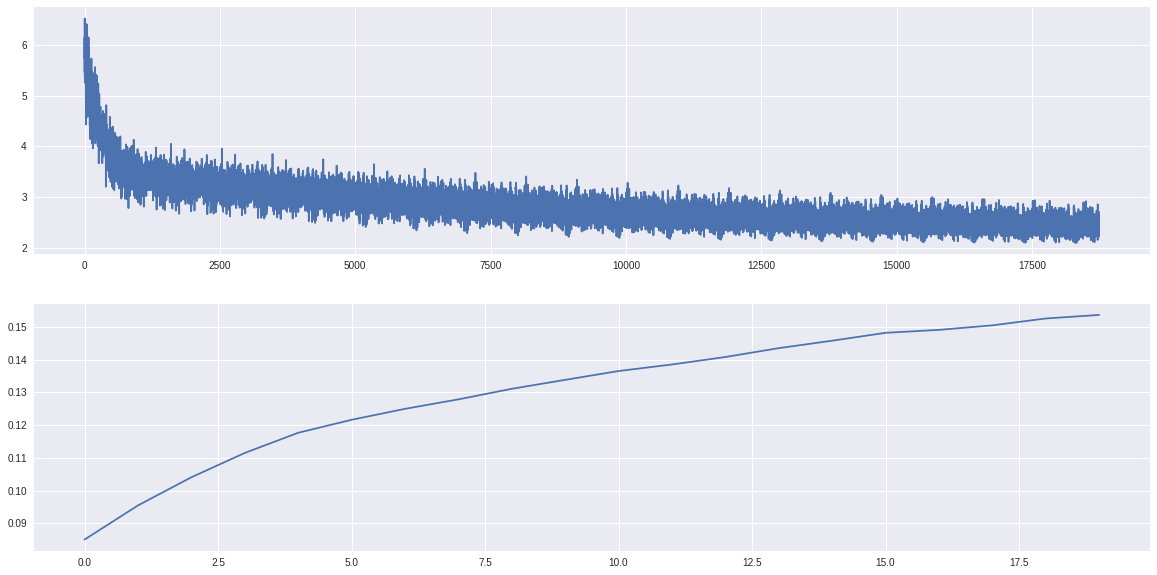

In [10]:
fig,axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(losses)
axes[1].plot(accs)